## DSS 615 - Assignment- 8B
## Sentiment Analysis
Modified: 2022-08-07 

**Remember to add your last name to the file name.** 


### Student: BRIAN PILLA

# RUBRIC FOR 8B
Total possible 15 points

* 0 pt - must have - Repeat the analysis from 8A for the original 8A data source **AND** a second similar data source.
* 2 pt - must have - Create a combined dataframe that has separate columns for each source. You can choose to add columns to the 8A data frame for the new data or add rows. If adding rows, be sure to have a column that will allow to you differentiate between the two data sources.
* 5 pt - Create a multi-plot scatter diagram that displays polarity vs subjectivity for the two sources. Be sure they are different colors and a legend is shown.
* 5 pt - Produce some basic statistics for the two sources including overall sentence count, overall sentiment for each source, basic descriptive (e.g. describe) stats for each source, and the correlation between polarity and subjectivity for each source.
* 3 pt - Write a few sentences of key observations that you made regarding the analysis. Include additional analysis you would suggest doing based on the initial results.

Deductions for:
* Crashing code
* Logic errors producing incorrect results
* Lack of attempt for some or all components.

### Objectives:
* Retrieve text data from an article, speech, story, debate or some other web-based source.
* Clean the data then perform sentiment analysis.


### Requirements:
* Direct link to web-site to retrieve data though ok to turn text into a locally stored file.
* Locally stored files will be saved and loaded from same folder as the notebook so professor can run your code.
* Text will not include substantial amounts of leftover HTML code. (No HTML is preferred!)
* Dropping of some lines of text should be performed if the web-site delivers text that should not be included in the sentiment analysis. For example, if the text is a commencment speech, the introductory paragraph would likely be dropped so only the keynote speech is analyzed.
* Use any methods you like to process the data and perform the sentiment analysis. You do not need to use the examples from the text book or the live class.

### Special Note:
* Assignment 8B will perform a similar analysis on two opposite views of a topic. Think ahead. Choose a topic here that will allow you to reuse this code and text on the next assignment.

Potential examples: 
* Two essays on different views on climate change.
* Two public domain e-books or essays that represent different historical views on racial equality or women's rights.
* A debate that includes two individuals debating on several topics. (This assignment would show results for just one individual. Assignment 8B would have both individuals.)
* Similar venue speeches from two individuals with different ideologies, for example: two commencment speeches from different US presidents, two acceptance speeches from political party conventions, two, two newspaper opinion pieces on similar topics, etc.)
* A speech that led to a successful outcome (e.g. JFK - "We choose to go to the moon.") and on speech that fell flat and didn't unite people to action. 

### Reminder: 
* Assignment 8A will only analyze one of the two. Assignment 8B will recreate 8A for the first speech/article/book and add and compare the second speech/article.

# Data Source 1: All working code from previous assignment


In [1]:
import requests        
from bs4 import BeautifulSoup      
from textblob import TextBlob      
from newspaper import Article

from pathlib import Path    

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

from newspaper import Article

# Magics
%matplotlib inline


%config InlineBackend.figure_format = 'retina'

In [2]:
url = 'https://news.stanford.edu/news/2005/june15/jobs-061505.html'  #Steve Jobs Commencement Speech

response = requests.get(url)   
response.text  

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta  name="publication_date" content="2005-06-14" />\n<meta  name="DC.date.issued" content="2005-06-14" />\n<meta  name="description" content="This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005." />\n<meta property="fb:app_id" content="100291490022087"/>\n<meta property="og:title" content="\'You\'ve got to find what you love,\' Jobs says" />\n<meta property="og:url" content="http://news.stanford.edu/news/2005/june15/jobs-061505.html" />\n<meta property="og:description" content="This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005." />\n\n<meta property="og:type" content="article" />\n<meta property="og:site_name" content="Stanford University" />\n\n<title>Text of Steve Jobs\' Commen

In [3]:
response.encoding = 'utf-8'
response.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta  name="publication_date" content="2005-06-14" />\n<meta  name="DC.date.issued" content="2005-06-14" />\n<meta  name="description" content="This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005." />\n<meta property="fb:app_id" content="100291490022087"/>\n<meta property="og:title" content="\'You\'ve got to find what you love,\' Jobs says" />\n<meta property="og:url" content="http://news.stanford.edu/news/2005/june15/jobs-061505.html" />\n<meta property="og:description" content="This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005." />\n\n<meta property="og:type" content="article" />\n<meta property="og:site_name" content="Stanford University" />\n\n<title>Text of Steve Jobs\' Commen

In [4]:
article = Article(url) 


article.download()    
article.parse()     


text = article.text  

In [5]:
url = 'https://news.stanford.edu/news/2005/june15/jobs-061505.html'
event = '-JOBS_STANFORD_05'   

In [6]:
article = Article(url)
article.download()
article.parse()
text = article.text   

print(article.text)

'You've got to find what you love,' Jobs says

This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005.

Video of the Commencement address.

I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.

The first story is about connecting the dots.

I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?

It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me 

In [7]:
with open('Jobs.txt', 'w') as f:  #write file of the speech
    f.writelines(text)
    
with open('Jobs.txt', 'r') as f:
    for cnt, line in enumerate(f): 
        print(f'Line {cnt}: {line}') 

Line 0: 'You've got to find what you love,' Jobs says

Line 1: 

Line 2: This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005.

Line 3: 

Line 4: Video of the Commencement address.

Line 5: 

Line 6: I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.

Line 7: 

Line 8: The first story is about connecting the dots.

Line 9: 

Line 10: I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?

Line 11: 

Line 12: It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me u

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
blob = TextBlob(article.text)
blob.words

WordList(["'You", "'ve", 'got', 'to', 'find', 'what', 'you', 'love', 'Jobs', 'says', 'This', 'is', 'a', 'prepared', 'text', 'of', 'the', 'Commencement', 'address', 'delivered', 'by', 'Steve', 'Jobs', 'CEO', 'of', 'Apple', 'Computer', 'and', 'of', 'Pixar', 'Animation', 'Studios', 'on', 'June', '12', '2005', 'Video', 'of', 'the', 'Commencement', 'address', 'I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', 'I', 'never', 'graduated', 'from', 'college', 'Truth', 'be', 'told', 'this', 'is', 'the', 'closest', 'I', "'ve", 'ever', 'gotten', 'to', 'a', 'college', 'graduation', 'Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', 'That', "'s", 'it', 'No', 'big', 'deal', 'Just', 'three', 'stories', 'The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', 'I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months', '

In [10]:
blob.sentiment

Sentiment(polarity=0.185597510822511, subjectivity=0.4939680735930736)

In [11]:
for indx, sentence in enumerate(blob.sentences):
    print(f'{indx}:  {sentence}')    
    print(f'\tSentiment: {sentence.sentiment}')
    print(f'\tPolarity:\t{sentence.polarity:>6.2f}')
    print(f'\tSubjectivity:\t{sentence.subjectivity:>6.2f}')
    print('\n--------------------------------------------------------\n')

0:  'You've got to find what you love,' Jobs says

This is a prepared text of the Commencement address delivered by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, on June 12, 2005.
	Sentiment: Sentiment(polarity=0.5, subjectivity=0.6)
	Polarity:	  0.50
	Subjectivity:	  0.60

--------------------------------------------------------

1:  Video of the Commencement address.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

2:  I am honored to be with you today at your commencement from one of the finest universities in the world.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

3:  I never graduated from college.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

4:  

	Subjectivity:	  0.65

--------------------------------------------------------

45:  Of course it was impossible to connect the dots looking forward when I was in college.
	Sentiment: Sentiment(polarity=-0.6666666666666666, subjectivity=1.0)
	Polarity:	 -0.67
	Subjectivity:	  1.00

--------------------------------------------------------

46:  But it was very, very clear looking backward 10 years later.
	Sentiment: Sentiment(polarity=0.06500000000000002, subjectivity=0.24916666666666665)
	Polarity:	  0.07
	Subjectivity:	  0.25

--------------------------------------------------------

47:  Again, you can't connect the dots looking forward; you can only connect them looking backward.
	Sentiment: Sentiment(polarity=0.0, subjectivity=1.0)
	Polarity:	  0.00
	Subjectivity:	  1.00

--------------------------------------------------------

48:  So you have to trust that the dots will somehow connect in your future.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.125)
	Polarity:	  0.00
	Su

	Sentiment: Sentiment(polarity=0.5, subjectivity=0.5)
	Polarity:	  0.50
	Subjectivity:	  0.50

--------------------------------------------------------

98:  Remembering that I'll be dead soon is the most important tool I've ever encountered to help me make the big choices in life.
	Sentiment: Sentiment(polarity=0.175, subjectivity=0.5)
	Polarity:	  0.17
	Subjectivity:	  0.50

--------------------------------------------------------

99:  Because almost everything — all external expectations, all pride, all fear of embarrassment or failure — these things just fall away in the face of death, leaving only what is truly important.
	Sentiment: Sentiment(polarity=0.02083333333333333, subjectivity=0.6)
	Polarity:	  0.02
	Subjectivity:	  0.60

--------------------------------------------------------

100:  Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose.
	Sentiment: Sentiment(polarity=1.0, subjectivity=0.3)
	Polarity:	  1.0

In [12]:
pd.set_option('max_colwidth', 400)    

p = []
s = []
txt = []
for sentence in blob.sentences:
    p.append(sentence.sentiment.polarity)
    s.append(sentence.sentiment.subjectivity)
    txt.append(str(sentence))

df_sent = pd.DataFrame(p,columns=['polarity'])
df_sent['subjectivity'] = s
df_sent['text'] = txt

df_sent.sort_values('polarity', ascending=True, inplace = True) 


df_sent

,polarity,subjectivity,text
80,-1.000000,1.000000,"It was awful tasting medicine, but I guess the patient needed it."
66,-0.700000,0.666667,I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly.
45,-0.666667,1.000000,Of course it was impossible to connect the dots looking forward when I was in college.
130,-0.300000,0.300000,Everything else is secondary.
22,-0.300000,0.600000,"But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition."
...,...,...,...
34,0.850000,1.000000,"Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed."
33,1.000000,0.300000,Let me give you one example:\n\nReed College at that time offered perhaps the best calligraphy instruction in the country.
72,1.000000,0.300000,"I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me."
78,1.000000,1.000000,And Laurene and I have a wonderful family together.


In [13]:
df_sent.corr() #correlation between polarity and subjectivity

,polarity,subjectivity
polarity,1.000000,0.353125
subjectivity,0.353125,1.000000


# Data Source 2: Copy previous code and adjust for new URL.
# You may need to create new variable and object names 
# depending on your approach

**Using Mark Zuckerberg's Harvard Commencement speeech from 2017**


In [14]:
url2 = 'https://www.cnbc.com/2017/05/26/full-text-of-mark-zuckerbergs-2017-harvard-commencement-speech.html'  #Mark Zuckerberg Commencement Speech

response = requests.get(url2)   
response.text  

'<!DOCTYPE html><html lang="en" prefix="og=https://ogp.me/ns#" itemscope="" itemType="https://schema.org/WebPage"><head><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" type="font/ttf" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_0_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_1_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_2_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_3_0.woff2" type="font/woff2" crossorigin="anonymous"/><meta name="format-detection" content="telephone=no"/><style type

In [15]:
response.encoding = 'utf-8'
response.text

'<!DOCTYPE html><html lang="en" prefix="og=https://ogp.me/ns#" itemscope="" itemType="https://schema.org/WebPage"><head><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" type="font/ttf" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_0_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_1_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_2_0.woff2" type="font/woff2" crossorigin="anonymous"/><link rel="preload" as="font" href="https://static-redesign.cnbcfm.com/dist/361747_3_0.woff2" type="font/woff2" crossorigin="anonymous"/><meta name="format-detection" content="telephone=no"/><style type

In [16]:
article2 = Article(url2) 


article2.download()    
article2.parse()     


text2 = article2.text 

In [17]:
url = 'https://www.cnbc.com/2017/05/26/full-text-of-mark-zuckerbergs-2017-harvard-commencement-speech.html'
event = '-ZUCKERBERG_HARVARD_17'  

In [18]:
print(article2.text)

Facebook founder and CEO Mark Zuckerberg addressed the graduates of the 366th class of Harvard University on Thursday. He called upon graduates to build a world where everyone has a sense of purpose. Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world...



I'm honored to be with you today, because let's face it, you accomplished something I never could. If I get through this speech, it'll be the first time I actually finish something at Harvard. Class of 2017, congratulations!



I'm an unlikely speaker, not just because I dropped out, but because we're technically in the same generation. We walked this yard less than a decade apart, studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here, especially if you came all the way from the Quad, but today I want to share what I've learned about our gen

In [19]:
with open('Zuckerberg.txt', 'w') as f:  #write file of the speech
    f.writelines(text2)
    
with open('Zuckerberg.txt', 'r') as f:
    for cnt, line in enumerate(f): 
        print(f'Line {cnt}: {line}') 

Line 0: Facebook founder and CEO Mark Zuckerberg addressed the graduates of the 366th class of Harvard University on Thursday. He called upon graduates to build a world where everyone has a sense of purpose. Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world...

Line 1: 

Line 2: 

Line 3: 

Line 4: I'm honored to be with you today, because let's face it, you accomplished something I never could. If I get through this speech, it'll be the first time I actually finish something at Harvard. Class of 2017, congratulations!

Line 5: 

Line 6: 

Line 7: 

Line 8: I'm an unlikely speaker, not just because I dropped out, but because we're technically in the same generation. We walked this yard less than a decade apart, studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here, especially if you came all 

In [20]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
blob2 = TextBlob(article2.text)
blob2.words

WordList(['Facebook', 'founder', 'and', 'CEO', 'Mark', 'Zuckerberg', 'addressed', 'the', 'graduates', 'of', 'the', '366th', 'class', 'of', 'Harvard', 'University', 'on', 'Thursday', 'He', 'called', 'upon', 'graduates', 'to', 'build', 'a', 'world', 'where', 'everyone', 'has', 'a', 'sense', 'of', 'purpose', 'Read', 'the', 'full', 'text', 'of', 'his', 'speech', 'President', 'Faust', 'Board', 'of', 'Overseers', 'faculty', 'alumni', 'friends', 'proud', 'parents', 'members', 'of', 'the', 'ad', 'board', 'and', 'graduates', 'of', 'the', 'greatest', 'university', 'in', 'the', 'world', 'I', "'m", 'honored', 'to', 'be', 'with', 'you', 'today', 'because', 'let', "'s", 'face', 'it', 'you', 'accomplished', 'something', 'I', 'never', 'could', 'If', 'I', 'get', 'through', 'this', 'speech', 'it', "'ll", 'be', 'the', 'first', 'time', 'I', 'actually', 'finish', 'something', 'at', 'Harvard', 'Class', 'of', '2017', 'congratulations', 'I', "'m", 'an', 'unlikely', 'speaker', 'not', 'just', 'because', 'I', 'd

In [22]:
blob2.sentences

[Sentence("Facebook founder and CEO Mark Zuckerberg addressed the graduates of the 366th class of Harvard University on Thursday."),
 Sentence("He called upon graduates to build a world where everyone has a sense of purpose."),
 Sentence("Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world..."),
 Sentence("I'm honored to be with you today, because let's face it, you accomplished something I never could."),
 Sentence("If I get through this speech, it'll be the first time I actually finish something at Harvard."),
 Sentence("Class of 2017, congratulations!"),
 Sentence("I'm an unlikely speaker, not just because I dropped out, but because we're technically in the same generation."),
 Sentence("We walked this yard less than a decade apart, studied the same ideas and slept through the same Ec10 lectures."),
 Sentence("We may have taken different paths to 

In [23]:
blob2.sentiment

Sentiment(polarity=0.13515047235750355, subjectivity=0.4981319895382396)

In [24]:
for indx, sentence in enumerate(blob2.sentences):
    print(f'{indx}:  {sentence}')    
    print(f'\tSentiment: {sentence.sentiment}')
    print(f'\tPolarity:\t{sentence.polarity:>6.2f}')
    print(f'\tSubjectivity:\t{sentence.subjectivity:>6.2f}')
    print('\n--------------------------------------------------------\n')

0:  Facebook founder and CEO Mark Zuckerberg addressed the graduates of the 366th class of Harvard University on Thursday.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

1:  He called upon graduates to build a world where everyone has a sense of purpose.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

2:  Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world...
	Sentiment: Sentiment(polarity=0.7166666666666667, subjectivity=0.85)
	Polarity:	  0.72
	Subjectivity:	  0.85

--------------------------------------------------------

3:  I'm honored to be with you today, because let's face it, you accomplished something I never could.
	Sentiment: Senti

	Subjectivity:	  0.55

--------------------------------------------------------

43:  The janitor responded: "Mr. President, I'm helping put a man on the moon."
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

44:  Finding your purpose isn't enough.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.5)
	Polarity:	  0.00
	Subjectivity:	  0.50

--------------------------------------------------------

45:  The challenge for our generation is creating a world where everyone has a sense of purpose.
	Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
	Polarity:	  0.00
	Subjectivity:	  0.00

--------------------------------------------------------

46:  Mark Zuckerberg CEO of Facebook

Purpose is that sense that we are part of something bigger than ourselves, that we are needed, that we have something better ahead to work for.
	Sentiment: Sentiment(polarity=0.25, subjectivity=0.5)
	Polar

	Subjectivity:	  0.00

--------------------------------------------------------

98:  Millions of more people built the Hoover dam and other great projects.
	Sentiment: Sentiment(polarity=0.39166666666666666, subjectivity=0.5416666666666666)
	Polarity:	  0.39
	Subjectivity:	  0.54

--------------------------------------------------------

99:  These projects didn't just provide purpose for the people doing those jobs, they gave our whole country a sense of pride that we could do great things.
	Sentiment: Sentiment(polarity=0.5, subjectivity=0.575)
	Polarity:	  0.50
	Subjectivity:	  0.57

--------------------------------------------------------

100:  Now it's our turn to do great things.
	Sentiment: Sentiment(polarity=0.8, subjectivity=0.75)
	Polarity:	  0.80
	Subjectivity:	  0.75

--------------------------------------------------------

101:  I know, you're probably thinking: I don't know how to build a dam, or get a million people involved in anything.
	Sentiment: Sentiment(polarity

In [25]:
pd.set_option('max_colwidth', 400)    

p = []
s = []
txt = []
for sentence in blob2.sentences:
    p.append(sentence.sentiment.polarity)
    s.append(sentence.sentiment.subjectivity)
    txt.append(str(sentence))

df_sent2 = pd.DataFrame(p,columns=['polarity'])
df_sent2['subjectivity'] = s
df_sent2['text'] = txt

df_sent2.sort_values('polarity', ascending=True, inplace = True) 


df_sent2

,polarity,subjectivity,text
87,-0.500000,0.90,"I wondered if I was just wrong, an impostor, a 22-year-old kid who had no idea how the world worked."
107,-0.500000,0.90,Movies and pop culture get this all wrong.
12,-0.500000,1.00,That could have been a really sad video.
111,-0.500000,0.90,"Oh, you know what else movies get wrong about innovation?"
117,-0.483333,0.70,"Anyone working on a complex problem will get blamed for not fully understanding the challenge, even though it's impossible to know everything upfront."
...,...,...,...
2,0.716667,0.85,"Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world..."
48,0.800000,1.00,You're graduating at a time when this is especially important.
100,0.800000,0.75,Now it's our turn to do great things.
15,0.900000,0.90,Mine was Computer Science 121 with the incredible Harry Lewis.


In [26]:
df_sent2.corr() #correlation between polarity and subjectivity

,polarity,subjectivity
polarity,1.000000,0.266139
subjectivity,0.266139,1.000000


In [27]:
## add column 'dataframe' for df_sent and df_sent2 to distinguish where each line of text came from

df_sent['dataframe'] = str('df_sent')
df_sent

,polarity,subjectivity,text,dataframe
80,-1.000000,1.000000,"It was awful tasting medicine, but I guess the patient needed it.",df_sent
66,-0.700000,0.666667,I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly.,df_sent
45,-0.666667,1.000000,Of course it was impossible to connect the dots looking forward when I was in college.,df_sent
130,-0.300000,0.300000,Everything else is secondary.,df_sent
22,-0.300000,0.600000,"But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition.",df_sent
...,...,...,...,...
34,0.850000,1.000000,"Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed.",df_sent
33,1.000000,0.300000,Let me give you one example:\n\nReed College at that time offered perhaps the best calligraphy instruction in the country.,df_sent
72,1.000000,0.300000,"I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me.",df_sent
78,1.000000,1.000000,And Laurene and I have a wonderful family together.,df_sent


In [28]:
df_sent2['dataframe'] = str('df_sent2')
df_sent2

,polarity,subjectivity,text,dataframe
87,-0.500000,0.90,"I wondered if I was just wrong, an impostor, a 22-year-old kid who had no idea how the world worked.",df_sent2
107,-0.500000,0.90,Movies and pop culture get this all wrong.,df_sent2
12,-0.500000,1.00,That could have been a really sad video.,df_sent2
111,-0.500000,0.90,"Oh, you know what else movies get wrong about innovation?",df_sent2
117,-0.483333,0.70,"Anyone working on a complex problem will get blamed for not fully understanding the challenge, even though it's impossible to know everything upfront.",df_sent2
...,...,...,...,...
2,0.716667,0.85,"Read the full text of his speech: President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board and graduates of the greatest university in the world...",df_sent2
48,0.800000,1.00,You're graduating at a time when this is especially important.,df_sent2
100,0.800000,0.75,Now it's our turn to do great things.,df_sent2
15,0.900000,0.90,Mine was Computer Science 121 with the incredible Harry Lewis.,df_sent2


# Combined Dataframe - Create a new dataframe (or add to the existing
# dataframe). Include all sentiment analysis related data for second
# data source

In [29]:
df3 = df_sent.merge(df_sent2, how = 'outer')
df3.sort_values(by=['subjectivity'], ascending= False)  #sorting to make sure all data was included in the merge. it was

,polarity,subjectivity,text,dataframe
0,-1.00,1.0,"It was awful tasting medicine, but I guess the patient needed it.",df_sent
275,0.60,1.0,"And that, Class of 2017, is why you should be nice to people.",df_sent2
143,0.85,1.0,"Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed.",df_sent
146,1.00,1.0,And Laurene and I have a wonderful family together.,df_sent
72,0.00,1.0,"Again, you can't connect the dots looking forward; you can only connect them looking backward.",df_sent
...,...,...,...,...
191,0.00,0.0,We can fix this.,df_sent2
190,0.00,0.0,"How about modernizing democracy so everyone can vote online, and personalizing education so everyone can learn?",df_sent2
189,0.00,0.0,These achievements are within our reach.,df_sent2
188,0.00,0.0,Let's do them all in a way that gives everyone in our society a role.,df_sent2


# Create scatter plot with two plots, one for each source
# Include a legend, additional annotation box with stats not required
# but would be a good challenge

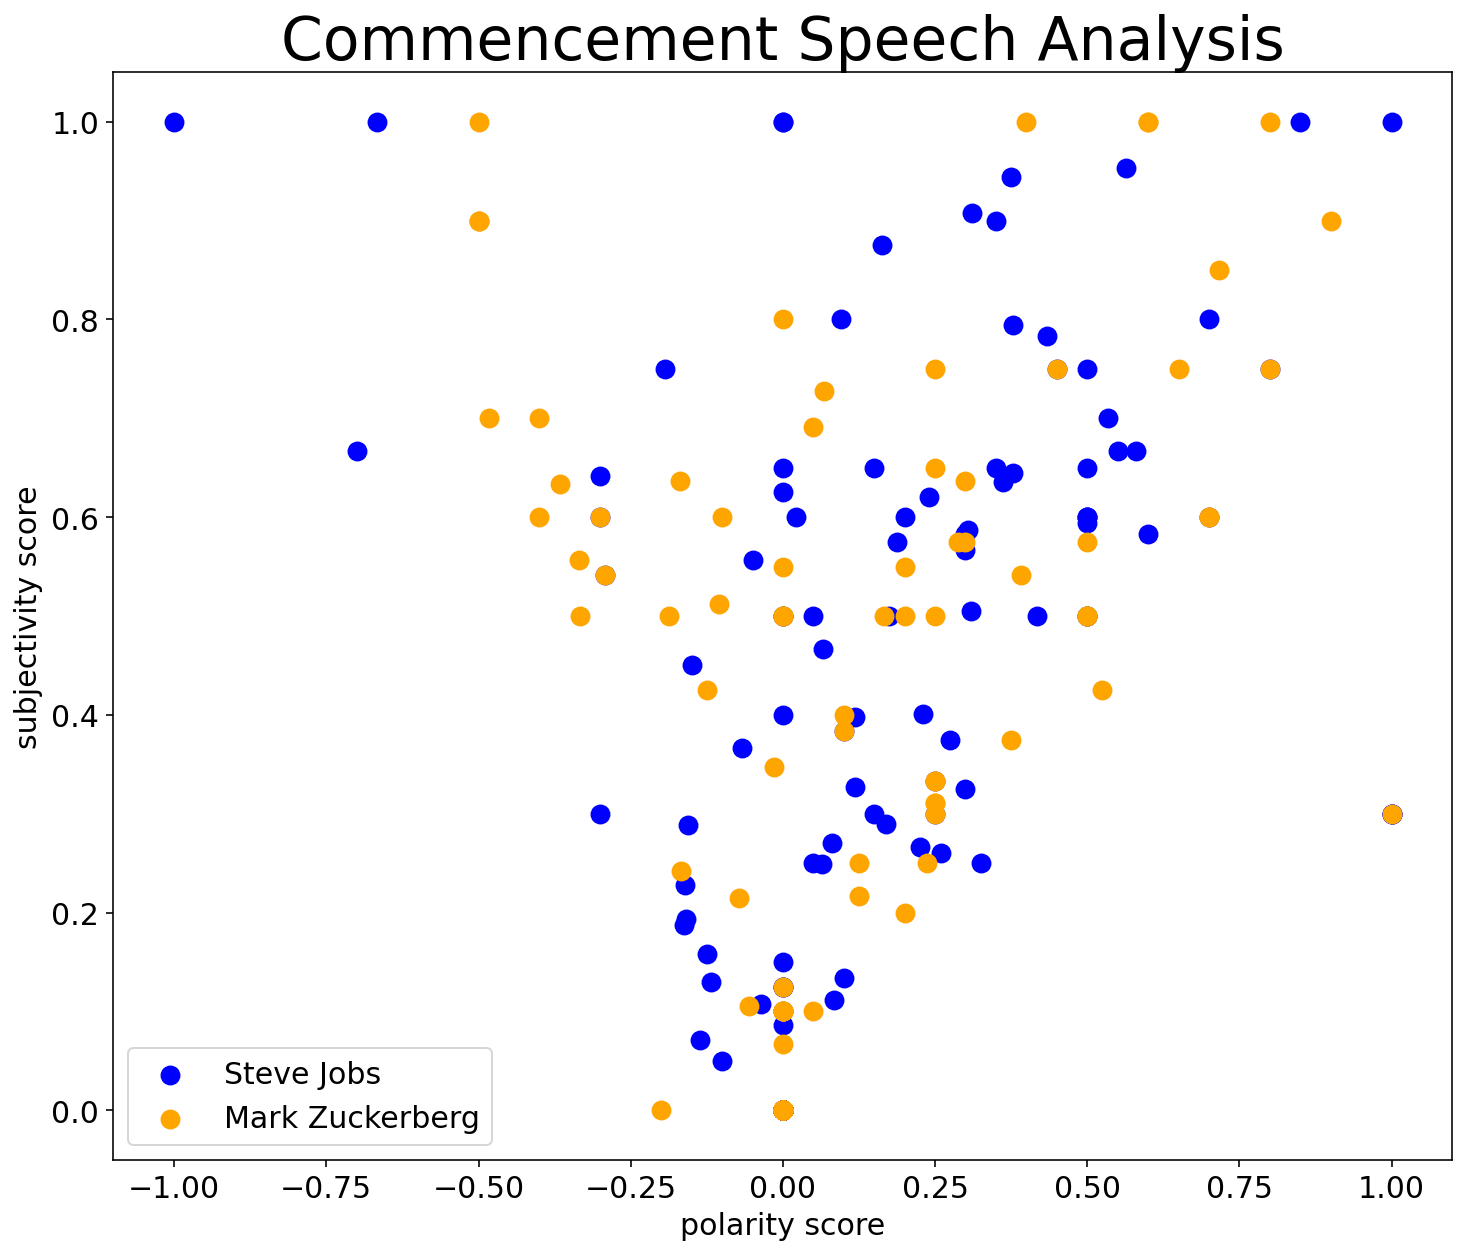

In [30]:
fig, ax = plt.subplots(figsize = (12, 10))
plt.xticks (fontsize= 15 ) 
plt.yticks (fontsize= 15 )

x1 = df_sent['polarity'].tolist()
y1 = df_sent['subjectivity'].tolist()
x2 = df_sent2['polarity'].tolist()
y2 = df_sent2['subjectivity'].tolist()

plt.scatter(x1, y1, s=80, color = 'b', label = 'Steve Jobs')
plt.scatter(x2, y2, s=80, color = 'orange', label = 'Mark Zuckerberg')

plt.title('Commencement Speech Analysis',fontsize=30)

plt.ylabel('subjectivity score', fontsize=15)
plt.xlabel('polarity score', fontsize=15)

plt.legend(loc='lower left', fontsize = 15)

# Print out key statistics in objectives


In [31]:
blob.sentiment  #Steve Jobs sentiment score

Sentiment(polarity=0.185597510822511, subjectivity=0.4939680735930736)

In [32]:
blob2.sentiment  #Mark Zuckerburg sentiment score

Sentiment(polarity=0.13515047235750355, subjectivity=0.4981319895382396)

In [33]:
# Steve Jobs desccriptive stats 

df_sent.describe()  

,polarity,subjectivity
count,148.000000,148.000000
mean,0.126485,0.328545
std,0.298407,0.319070
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.289444
75%,0.300000,0.600000
max,1.000000,1.000000


In [34]:
# Mark Zuckerberg descriptive stats

df_sent2.describe()

,polarity,subjectivity
count,136.000000,136.000000
mean,0.077302,0.287625
std,0.277381,0.318695
min,-0.500000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.115278
75%,0.200000,0.543750
max,1.000000,1.000000


In [35]:
# Combined descriptive statistics

df3.describe()

,polarity,subjectivity
count,284.000000,284.000000
mean,0.102933,0.308950
std,0.289072,0.318985
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.250000
75%,0.250000,0.577083
max,1.000000,1.000000


In [36]:
# Combined Correlation score

df3.corr()

,polarity,subjectivity
polarity,1.000000,0.316577
subjectivity,0.316577,1.000000


# My Analysis

   Steve Jobs gave one of the most recognized commencement speeches before the Stanford graduation class of 2005, just 6 years before his death. Mark Zuckerberg, the founder of Facebook, also gave a commendable speech before Harvard's graduating class of 2017. For this assignment, I decided to run an analysis of the two speeches to interpret how each speech could be received by an audience. For this project, I analyzed two pieces of data, polarity in the speech, and subjectivity. Each was measured on a scale of -1 to 1. 
    
   Polarity: -1 being very negative sounding and 1 being very positive souding
   Subjectivity: 0 being very objective (fact-based) and 1 being very subjective (opinionated)
    
    
   My analysis is as follows:
    
   The sentiment score for Steve Jobs speech show that there was a polarity score of .1856 and a subjectivity of .4939. This can be interpreted as Jobs' speech not being too positive or negative, and also that the content of his speech hovers right in the middle between fact-based and opinionated. 
    
   Zuckerburg scored relatively the same in subjectivity at .4981 and polarity at .1351. This suggests to me that Zuckerburg also tried to keep his speech relatively balanced in tone and content but had a slightly more negative approach to his wording. 
    
   Finally, I combined the two speeches into one analysis to see if I could interpret my findings any differently with more of a sample size. In this case, I looked at the descriptive statistics and interpreted the mean of both variables. With only 284 sentence lines between the two speeches, it didn't change much. Mean polarity was .1029 (a relatively neutral and balanced tone) and subjectivity was .3090 (slightly lower than the sentiment scores but still suggesting the conent was balanced.) 
    
   My takeaway is that these speeches are recognized as some of the best for a reason. They suggest that a balanced tone between positive and negative content along with fact-based statements is a recipe for a good speech. It says that having some uplifting, positive content is just as important as having some somber content. If I could add to this analysis and continue interpreting the lines of each speech, I would want to interpret a metric that captures attention (something like a scale of -1 being very boring and 1 being very attentive.) I think this would help speech writers significantly going forward. 


## Reminder:
*Before submitting:*
* Run all cells
* Save the file
* Be sure your last name is part of the file name